In [6]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [7]:
train = pd.read_csv("digit-recognizer/train.csv")

In [8]:
print(train)

train_x = train.loc[:,"pixel0":]
train_y = train.loc[:,"label"]


       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

(28, 28)


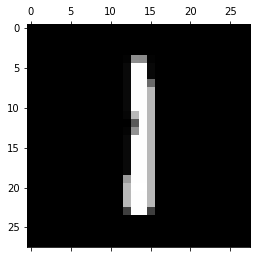

In [9]:
# show picture
one_pic = train.loc[2,"pixel0":]
one_pic = one_pic.to_numpy()
one_pic = one_pic.reshape(28,28)
print(one_pic.shape)

plt.matshow(one_pic, cmap=plt.get_cmap('gray'))

In [10]:
train_x_reshape = []

for i in range(len(train_x)):
    train_x_reshape.append(train_x.loc[i,:].to_numpy().reshape(28,28,1))  # for cNN，need more dim 
train_x_reshape = np.array(train_x_reshape)

In [70]:
# flatten version 

model = tf.keras.models.Sequential([

  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Dense(10),
])

In [11]:
# cNN version
model = tf.keras.models.Sequential([

  tf.keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28,1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10),
])

In [16]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [17]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [18]:
model.fit(train_x_reshape, train_y, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.2546 - accuracy: 0.9379
Epoch 2/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0658 - accuracy: 0.9806
Epoch 3/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0530 - accuracy: 0.9839
Epoch 4/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0426 - accuracy: 0.9875
Epoch 5/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0378 - accuracy: 0.9889
Epoch 6/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0363 - accuracy: 0.9887
Epoch 7/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0292 - accuracy: 0.9909
Epoch 8/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0288 - accuracy: 0.9913
Epoch 9/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0245 - accuracy: 0.9924
Epoch 10/10
1313/1313 [==============================] - 14s 11m

In [19]:
test = pd.read_csv("digit-recognizer/test.csv")

In [20]:
test_x = test.loc[:,"pixel0":]


In [21]:
test_x_reshape = []

for i in range(len(test_x)):
    test_x_reshape.append(test_x.loc[i,:].to_numpy().reshape(28,28,1))
test_x_reshape = np.array(test_x_reshape)

In [22]:
import numpy as np
predict = model.predict(test_x_reshape)
test_y_hat = []
for i in range(len(predict)):
    test_y_hat.append(np.argmax(predict[i]))

In [63]:
print(test_y_hat)

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1, 5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7, 8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 9, 4, 1, 7, 0, 0, 0, 1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 9, 9, 2, 3, 5, 4, 1, 8, 9, 2, 4, 3, 6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4, 0, 9, 2, 0, 7, 3, 0, 5, 0, 8, 0, 0, 4, 7, 1, 7, 1, 1, 3, 3, 3, 7, 2, 8, 6, 3, 8, 7, 8, 4, 3, 5, 6, 0, 0, 0, 3, 1, 3, 6, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 4, 3, 5, 6, 5, 3, 7, 5, 7, 8, 3, 0, 4, 5, 1, 2, 7, 6, 3, 0, 2, 7, 8, 6, 1, 3, 7, 4, 1, 2, 4, 8, 5, 2, 4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7, 6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 3, 2, 1, 6, 3, 4, 2, 3, 1, 2, 2, 0, 4, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 3, 8, 6, 8, 6, 2, 8, 5, 5, 4, 8, 3, 8, 9, 7, 1, 3, 8, 4, 5, 1, 4, 5, 6, 3, 3, 5, 7, 0, 6, 8, 3, 1, 6, 0, 6, 3, 9, 3, 1, 5, 8, 4, 0, 9, 2, 0, 5, 3, 7, 1, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6, 9, 8, 2, 6, 3, 7, 1, 4, 5, 8, 5, 9, 0, 0, 3, 8, 4, 1, 8, 4, 1, 1, 9, 8, 4, 9, 1, 5, 3, 6, 3, 1, 

In [23]:
predict = model.predict(train_x_reshape)
train_y_hat = []
for i in range(len(predict)):
    train_y_hat.append(np.argmax(predict[i]))

In [24]:
m = tf.keras.metrics.Accuracy()
m.update_state(train_y_hat, train_y)
m.result().numpy()

# train 0.95730954 (128兩層)
# test  0.94128

# train 0.96859527 (512 五層)
# test  0.95603

# train 0.99609524 (CNN 3層)
# test 0.98367     
# 比較參數 512 五層 卻有 1,195,018
# CNN 3層  只有            90,978  個 trainable parameter 

# 這就是架構不同的力量 !! (CN有參考到2D相鄰資訊)

0.99259526

442
5 6
456
3 5
548
6 4
644
7 2
884
2 7
1030
9 7
1106
2 1
1175
7 2
1179
9 4
1224
8 4
1294
2 1
1375
2 0
2137
9 7
2453
6 5
2478
9 4
3385
6 5
3521
2 8
3783
0 1


KeyboardInterrupt: 

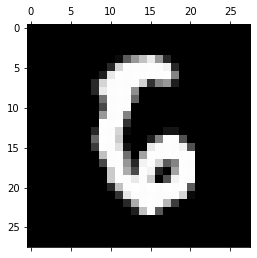

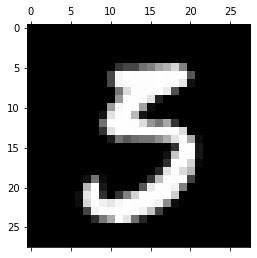

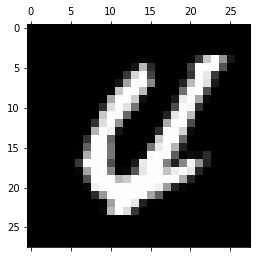

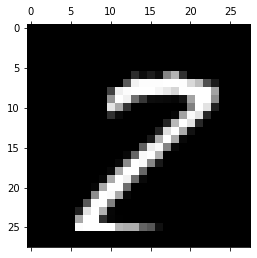

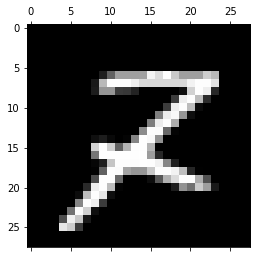

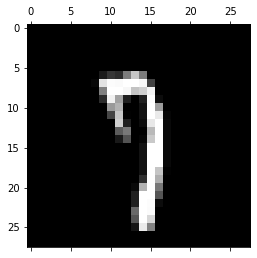

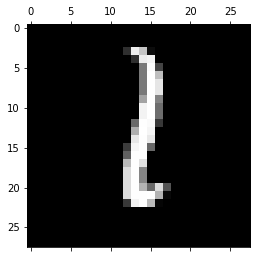

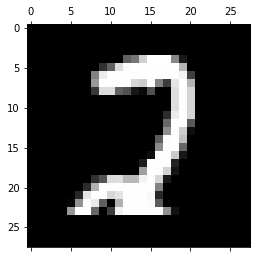

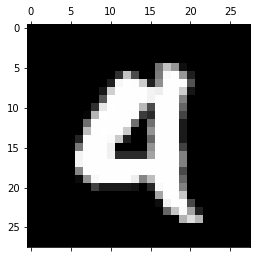

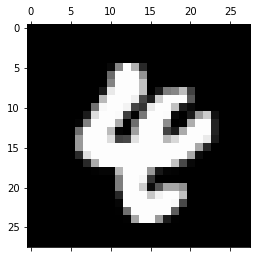

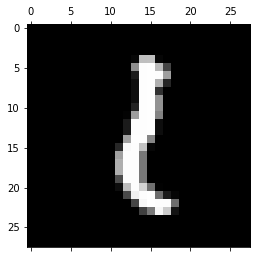

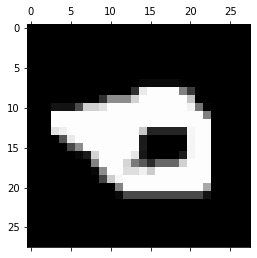

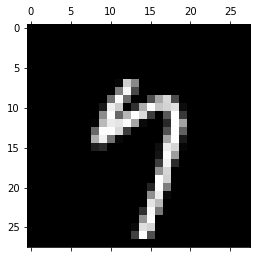

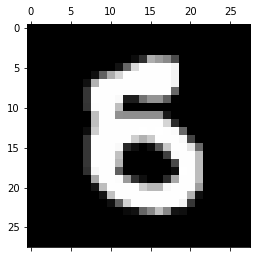

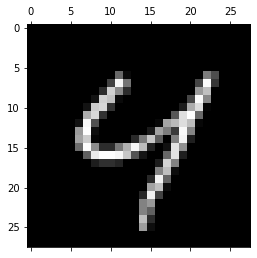

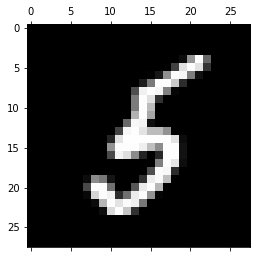

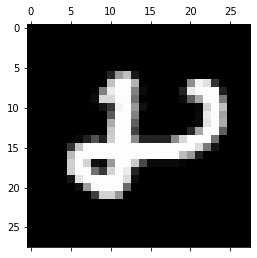

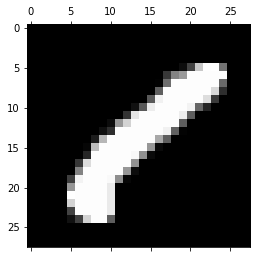

In [66]:
# show the wrong case
import time
for i in range(len(train_x)):
    if train_y_hat[i] != train_y[i]:
        print(i)
        one_pic = train_x.loc[i,:]
        one_pic = one_pic.to_numpy()
        one_pic = one_pic.reshape(28,28)
        #print(one_pic.shape)
        print(train_y_hat[i] , train_y[i])
        plt.matshow(one_pic, cmap=plt.get_cmap('gray'))
        time.sleep(2)

In [30]:
# try add one more KNN layer 

# make knn X and y 
train_x_ten_dim = model.predict(train_x_reshape)
test_x_ten_dim = model.predict(test_x_reshape)

# check point :  print(train_y_ten_dim[0] , train_y[0])



# KNN model
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=10)



neigh.fit(train_x_ten_dim, train_y)

# KNN效果提升  0.98367 ==> 0.98517
# 但其實沒有很明顯

KNeighborsClassifier(n_neighbors=10)

In [35]:
knn_train_y_hat = neigh.predict(train_x_ten_dim)



In [36]:
m = tf.keras.metrics.Accuracy()
m.update_state(knn_train_y_hat, train_y)
m.result().numpy()  
# 提升0.99259526 ==> 0.9957857

0.9957857

89
4 6
328
9 5
686
9 5
856
9 7
897
8 1
1834
0 8
2453
6 5
2541
4 2
3455
2 0
3715
7 9
3759
5 9
3997
4 6
4040
3 5
4790
6 0
5051
9 8
5283
2 8
5404
9 4
5581
8 2
5659
9 4
5695
8 5
5747
9 8


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


5843
8 1
5885
6 0
5990
8 2
6306
7 1
6543
1 0
6576
3 1


KeyboardInterrupt: 

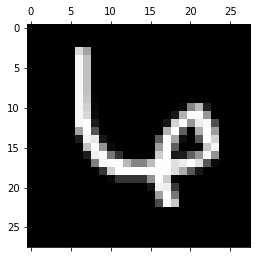

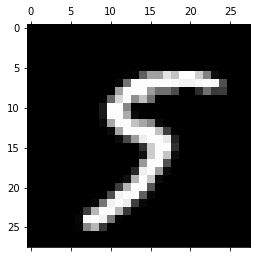

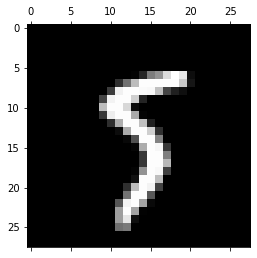

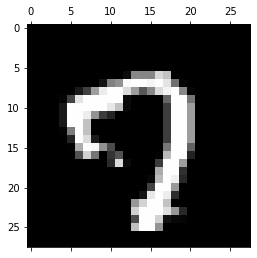

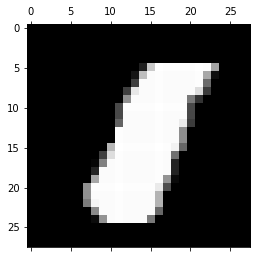

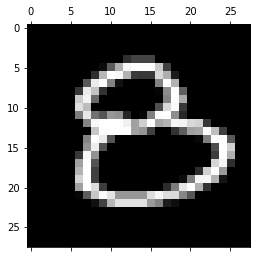

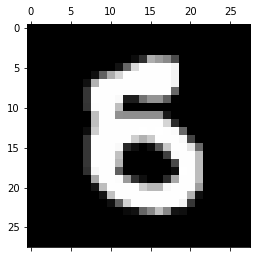

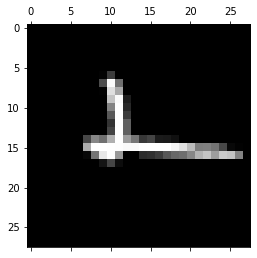

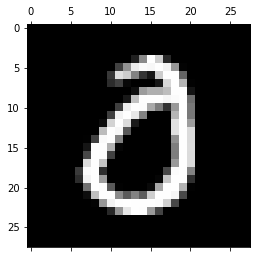

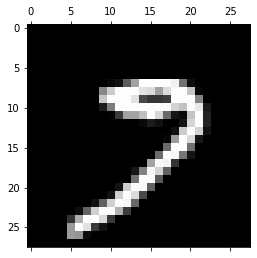

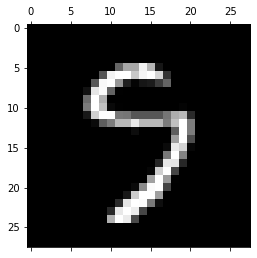

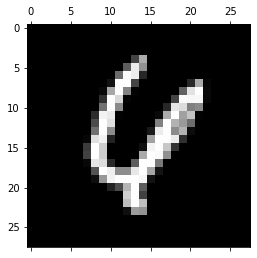

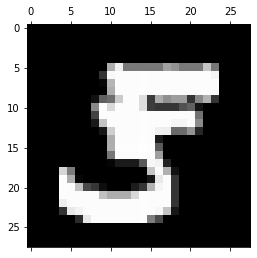

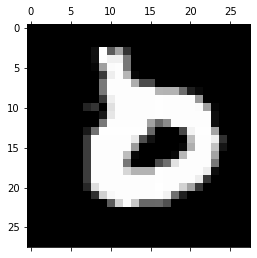

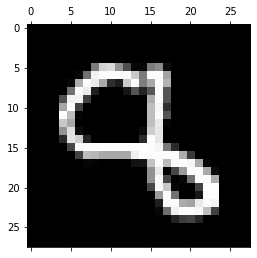

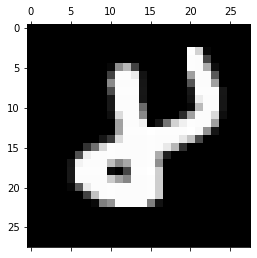

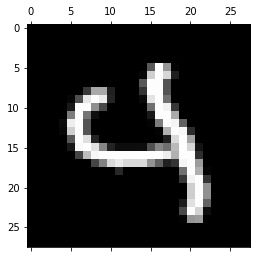

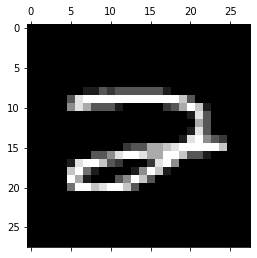

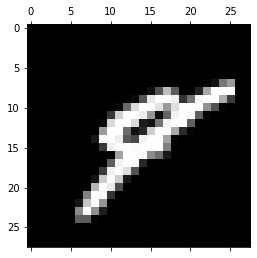

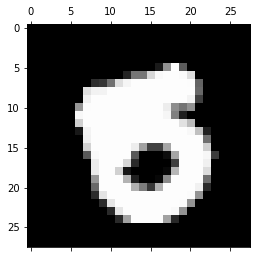

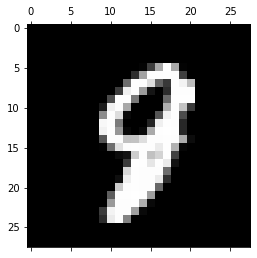

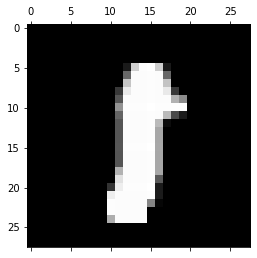

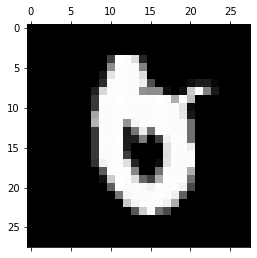

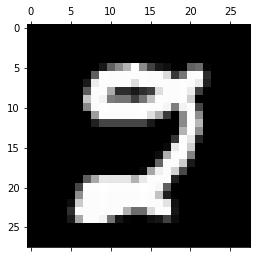

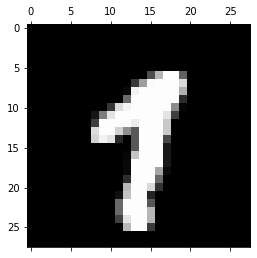

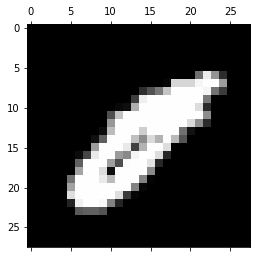

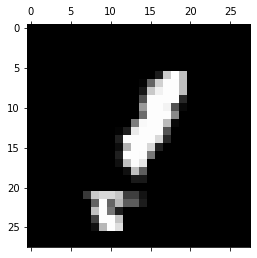

In [39]:
# show knn the wrong case
import time
for i in range(len(train_x)):
    if train_y_hat[i] != train_y[i]:
        print(i)
        one_pic = train_x.loc[i,:]
        one_pic = one_pic.to_numpy()
        one_pic = one_pic.reshape(28,28)
        #print(one_pic.shape)
        print(train_y_hat[i] , train_y[i])
        plt.matshow(one_pic, cmap=plt.get_cmap('gray'))
        time.sleep(0.5)

In [37]:
test_y_hat = neigh.predict(test_x_ten_dim)

In [38]:
# make answer.csv
temp = {"ImageId":[],"Label":[]}
count = 1

for i in test_y_hat:
    
    temp["ImageId"].append(count)
    
    #temp["SalePrice"].append((i)**2)
    temp["Label"].append(i)
    count+=1

temp = pd.DataFrame(temp)
!del answer.csv
temp.to_csv("answer.csv",index=False)